# **MINOR PROJECT**

---






# **TASK 1** - Exploratory Data Analysis

<-----------------------Question 1----------------------------->
Are there any missing values in the dataset? If so, how will you handle them? How is the wind speed distributed in the dataset? Are there any outliers or extreme values?

In [1]:
import pandas as pd
df=pd.read_csv("wind_dataset.csv")
df.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,01-01-1961,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,02-01-1961,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,03-01-1961,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,04-01-1961,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,05-01-1961,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [2]:
print(df.isnull().sum())

DATE         0
WIND         0
IND          0
RAIN         0
IND.1       61
T.MAX      621
IND.2       61
T.MIN      674
T.MIN.G    360
dtype: int64


In [3]:
colu = ["IND.1","T.MAX" ,"IND.2" ,"T.MIN" ,"T.MIN.G" ]
for i in colu:
    print(i)
    print(df[i].mode())

IND.1
0    0.0
Name: IND.1, dtype: float64
T.MAX
0    10.0
Name: T.MAX, dtype: float64
IND.2
0    0.0
Name: IND.2, dtype: float64
T.MIN
0    9.0
Name: T.MIN, dtype: float64
T.MIN.G
0    5.0
Name: T.MIN.G, dtype: float64


In [4]:
FilterInd1 = 0.0
FilterTmax = 10.0
FilterInd =0.0
FilterTMIN = 9.0
FilterTMIN_g = 5.0
df["IND.1"].fillna(FilterInd1 , inplace = True)
df["T.MAX"].fillna(FilterTmax , inplace = True)
df["IND.2"].fillna(FilterInd , inplace = True)
df["T.MIN"].fillna(FilterTMIN , inplace = True)
df["T.MIN.G"].fillna(FilterTMIN_g , inplace = True)

In [5]:
df.isnull().sum()

DATE       0
WIND       0
IND        0
RAIN       0
IND.1      0
T.MAX      0
IND.2      0
T.MIN      0
T.MIN.G    0
dtype: int64

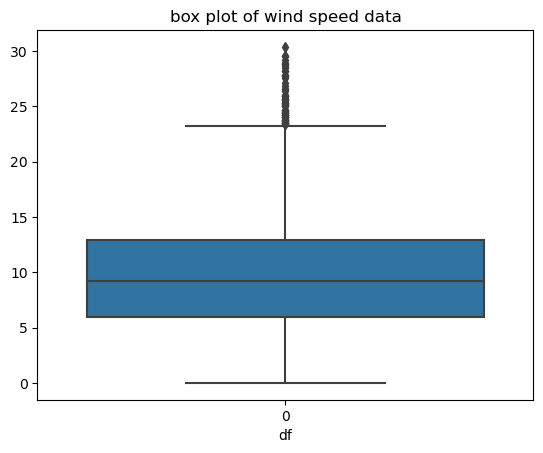

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df["WIND"])
plt.xlabel('df')
plt.title('box plot of wind speed data')
plt.show()

Summarizing your analysis and observation

<-----------------------Question 2----------------------------->
 How does the wind speed vary over time? Can you visualize any trends or patterns using line plots or time series analysis?

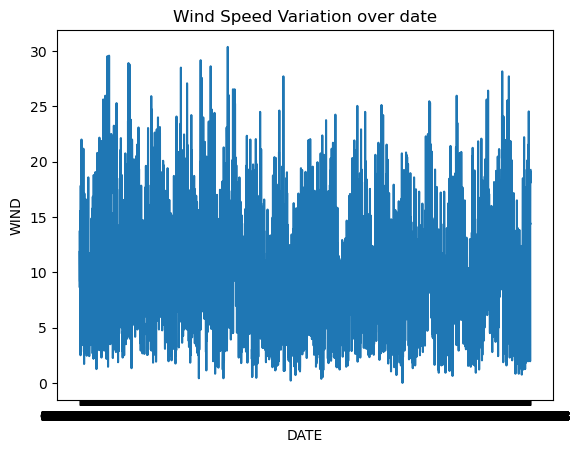

In [7]:
import matplotlib.pyplot as plt
data = pd.read_csv("wind_dataset.csv")
plt.plot(df["DATE"],df["WIND"])
plt.xlabel('DATE')
plt.ylabel('WIND')
plt.title('Wind Speed Variation over date')
plt.show()

Summarizing your analysis and observations

<-----------------------Question 3----------------------------->
Are there any seasonal patterns in wind speed or other weather variables? Analyze and visualize these patterns using seasonal decomposition or seasonal subseries plots?

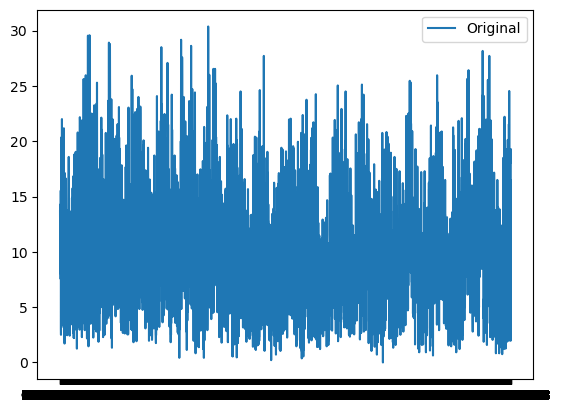

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv("wind_dataset.csv")
decomposition = seasonal_decompose(df["WIND"], period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.plot(df["DATE"], df["WIND"])
plt.legend(["Original"])
plt.show()

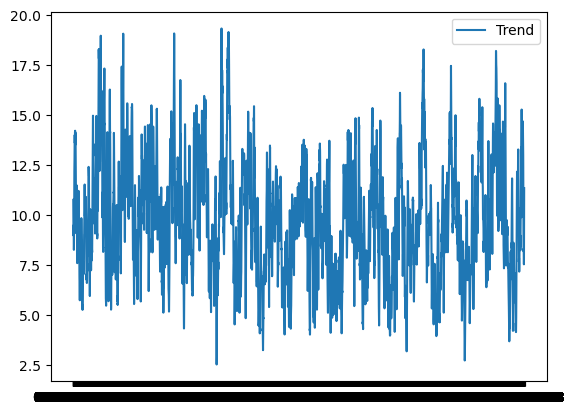

In [9]:
plt.plot(df["DATE"], trend)
plt.legend(["Trend"])
plt.show()

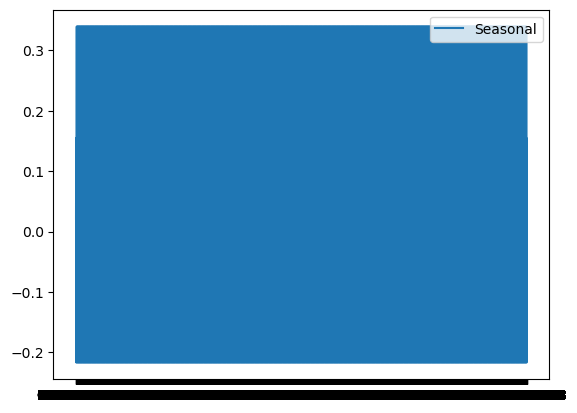

In [10]:
plt.plot(df["DATE"], seasonal)
plt.legend(["Seasonal"])
plt.show()



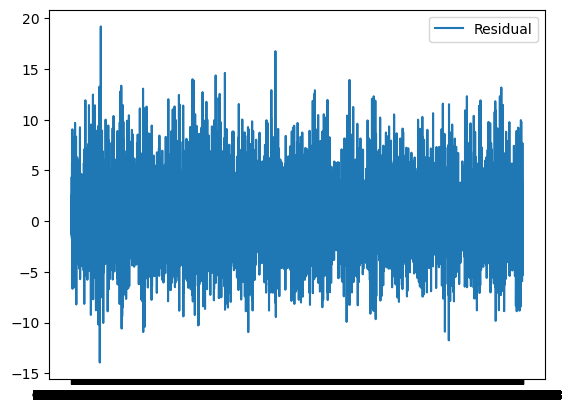

In [11]:
plt.plot(df["DATE"], residual)
plt.legend(["Residual"])
plt.show()

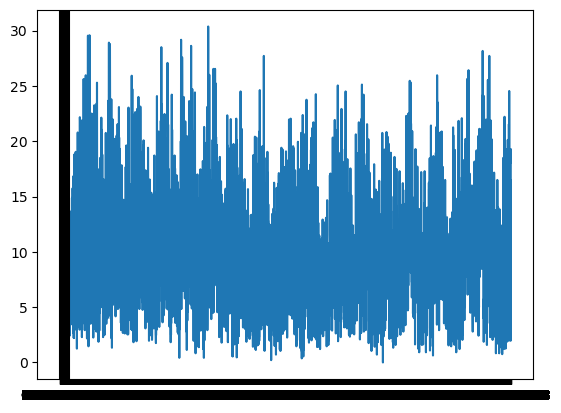

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("wind_dataset.csv")
plt.plot(df["DATE"], df["WIND"])
for i in range(12):
    plt.axvline(df["DATE"][i * 12], color="black")
plt.show()

Summarizing your analysis and observation

<-----------------------Question 4----------------------------->
What is the distribution of other weather variables such as precipitation amount, maximum temperature, minimum temperature, and grass minimum temperature? Visualize their distributions using histograms or density plots.

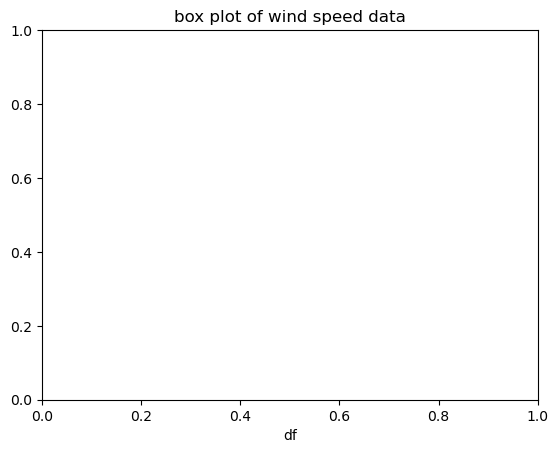

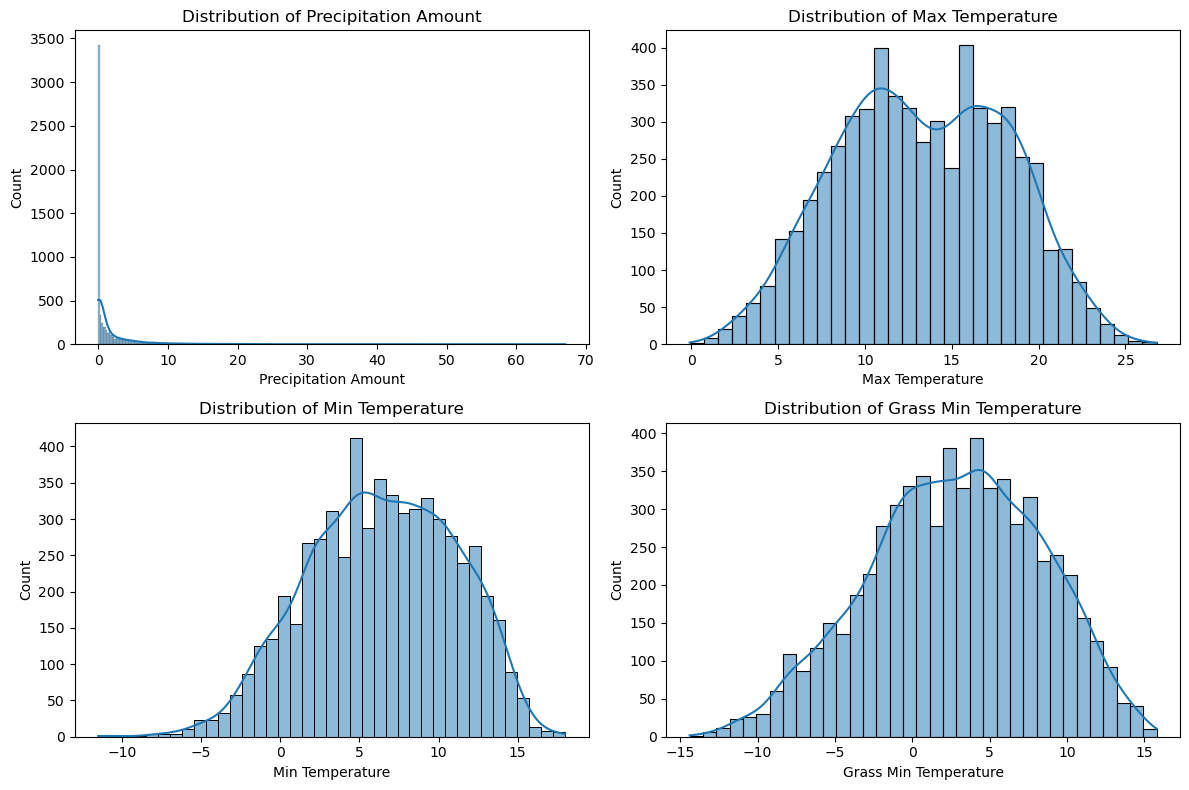

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
# sns.boxplot(data=df["RAIN"]["T.MAX"]["T.MIN"]["T.MIN.G"])
plt.xlabel('df')
plt.title('box plot of wind speed data')
# Select the columns containing weather variables
precipitation_amount = df['RAIN']
max_temperature = df['T.MAX']
min_temperature = df['T.MIN']
grass_min_temperature = df['T.MIN.G']

# Plot histograms for each weather variable
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(precipitation_amount, kde=True)
plt.xlabel('Precipitation Amount')
plt.title('Distribution of Precipitation Amount')

plt.subplot(2, 2, 2)
sns.histplot(max_temperature, kde=True)
plt.xlabel('Max Temperature')
plt.title('Distribution of Max Temperature')

plt.subplot(2, 2, 3)
sns.histplot(min_temperature, kde=True)
plt.xlabel('Min Temperature')
plt.title('Distribution of Min Temperature')

plt.subplot(2, 2, 4)
sns.histplot(grass_min_temperature, kde=True)
plt.xlabel('Grass Min Temperature')
plt.title('Distribution of Grass Min Temperature')

plt.tight_layout()
plt.show()

plt.show()

Summarizing your analysis and observations

<-----------------------Question 5----------------------------->
Extract any additional features from the given dataset that may be relevant for wind speed prediction? HINT- For example, you could calculate daily or monthly averages, differences, or time lags of the weather variables.

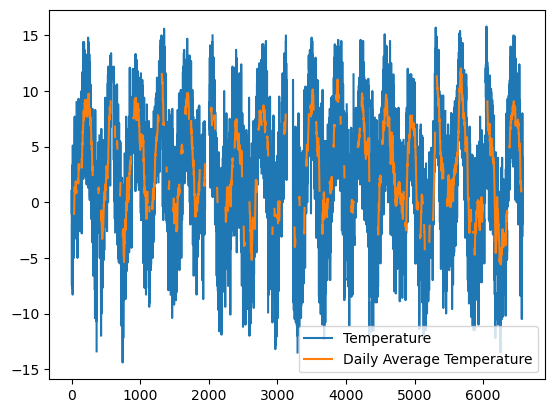

In [20]:
import pandas as pd
import numpy as np
df = pd.read_csv("wind_dataset.csv")
# Calculate daily averages
df["DAILY_AVERAGE_TEMPERATURE"] = df["T.MIN.G"].rolling(window=24).mean()
df["DAILY_AVERAGE_PRECIPITATION"] = df["RAIN"].rolling(window=24).mean()
df["DAILY_AVERAGE_WIND_SPEED"] = df["WIND"].rolling(window=24).mean()



# Plot the time series of the original and extracted features
plt.plot(df["T.MIN.G"], label="Temperature")
plt.plot(df["DAILY_AVERAGE_TEMPERATURE"], label="Daily Average Temperature")



plt.legend()

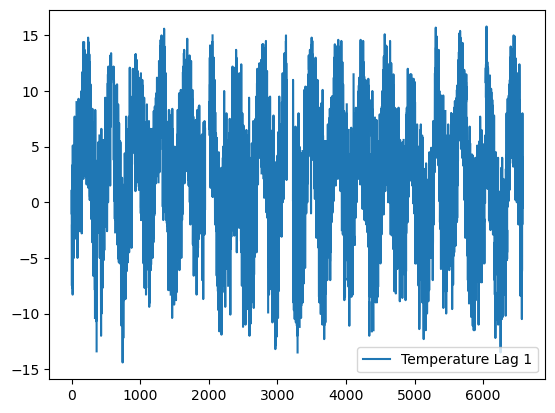

In [19]:
# Calculate time lags
df["TEMPERATURE_LAG1"] = df["T.MIN.G"].shift(1)
df["PRECIPITATION_LAG1"] = df["RAIN"].shift(1)
df["WIND_SPEED_LAG1"] = df["WIND"].shift(1)
plt.plot(df["TEMPERATURE_LAG1"], label="Temperature Lag 1")
plt.legend()

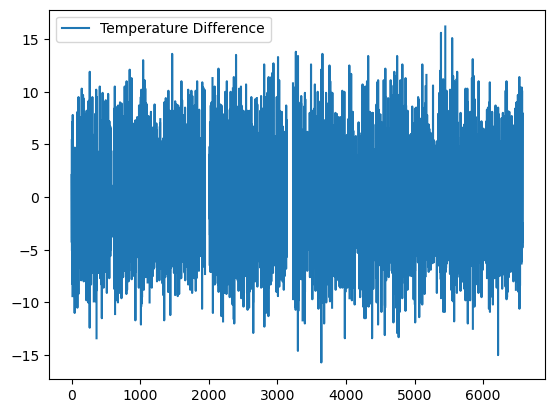

In [17]:
# Calculate differences
df["TEMPERATURE_DIFFERENCE"] = df["T.MIN.G"].diff()
df["PRECIPITATION_DIFFERENCE"] = df["RAIN"].diff()
df["WIND_SPEED_DIFFERENCE"] = df["WIND"].diff()
plt.plot(df["TEMPERATURE_DIFFERENCE"], label="Temperature Difference")
plt.legend()

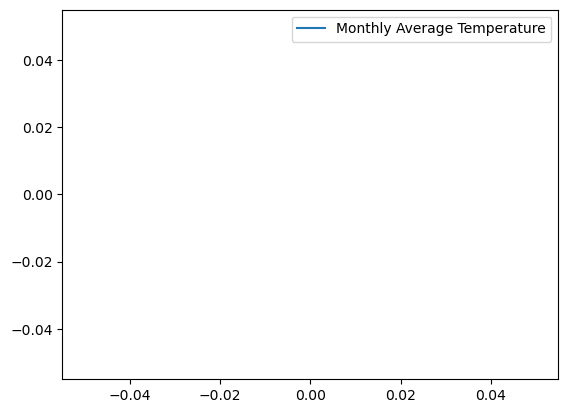

In [15]:
# Calculate monthly averages
df["MONTHLY_AVERAGE_TEMPERATURE"] = df["T.MIN.G"].groupby(df["DATE"]).mean()
df["MONTHLY_AVERAGE_PRECIPITATION"] = df["RAIN"].groupby(df["DATE"]).mean()
df["MONTHLY_AVERAGE_WIND_SPEED"] = df["WIND"].groupby(df["DATE"]).mean()
plt.plot(df["MONTHLY_AVERAGE_TEMPERATURE"], label="Monthly Average Temperature")
plt.legend()

Summarizing your analysis and observation

# **TASK 2** - Classification/Regression

Perform following steps on the same dataset which you used for EDA.
> - Data Preprocessing (as per requirement)
> - Feature Engineering
> - Split dataset in train-test (80:20 ratio)
> - Model selection
> - Model training
> - Model evaluation
> - Fine-tune the Model
> - Make predictions

Summarize your model's performance by evaluation metrices



# DATA PREPROCESSING


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [22]:
df = pd.read_csv('wind_dataset.csv', sep = ',')
#df = pd.DataFrame(df)
df.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,01-01-1961,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,02-01-1961,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,03-01-1961,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,04-01-1961,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,05-01-1961,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [24]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.DATE.dtype

dtype('<M8[ns]')

# FEATURE ENGINEERING

In [25]:
df['year'] = df['DATE'].dt.year
df['month'] = df['DATE'].dt.month
df['day'] = df['DATE'].dt.day
df['week'] = df['DATE'].dt.isocalendar().week
df['qtr'] = df['DATE'].dt.quarter
df['weekday'] = df['DATE'].dt.weekday

In [26]:
df.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,year,month,day,week,qtr,weekday
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0,1961,1,1,52,1,6
1,1961-02-01,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1,1961,2,1,5,1,2
2,1961-03-01,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5,1961,3,1,9,1,2
3,1961-04-01,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2,1961,4,1,13,2,5
4,1961-05-01,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5,1961,5,1,18,2,0


In [27]:
df.isnull().sum()

DATE         0
WIND         0
IND          0
RAIN         0
IND.1       61
T.MAX      621
IND.2       61
T.MIN      674
T.MIN.G    360
year         0
month        0
day          0
week         0
qtr          0
weekday      0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     6574 non-null   datetime64[ns]
 1   WIND     6574 non-null   float64       
 2   IND      6574 non-null   int64         
 3   RAIN     6574 non-null   float64       
 4   IND.1    6513 non-null   float64       
 5   T.MAX    5953 non-null   float64       
 6   IND.2    6513 non-null   float64       
 7   T.MIN    5900 non-null   float64       
 8   T.MIN.G  6214 non-null   float64       
 9   year     6574 non-null   int64         
 10  month    6574 non-null   int64         
 11  day      6574 non-null   int64         
 12  week     6574 non-null   UInt32        
 13  qtr      6574 non-null   int64         
 14  weekday  6574 non-null   int64         
dtypes: UInt32(1), datetime64[ns](1), float64(7), int64(6)
memory usage: 751.3 KB


In [29]:
df = pd.get_dummies(df, columns = ['week'])
df = df.drop(['DATE'], axis = 1)
df.head()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,year,month,...,week_44,week_45,week_46,week_47,week_48,week_49,week_50,week_51,week_52,week_53
0,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0,1961,1,...,0,0,0,0,0,0,0,0,1,0
1,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1,1961,2,...,0,0,0,0,0,0,0,0,0,0
2,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5,1961,3,...,0,0,0,0,0,0,0,0,0,0
3,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2,1961,4,...,0,0,0,0,0,0,0,0,0,0
4,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5,1961,5,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 66 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   WIND     6574 non-null   float64
 1   IND      6574 non-null   int64  
 2   RAIN     6574 non-null   float64
 3   IND.1    6513 non-null   float64
 4   T.MAX    5953 non-null   float64
 5   IND.2    6513 non-null   float64
 6   T.MIN    5900 non-null   float64
 7   T.MIN.G  6214 non-null   float64
 8   year     6574 non-null   int64  
 9   month    6574 non-null   int64  
 10  day      6574 non-null   int64  
 11  qtr      6574 non-null   int64  
 12  weekday  6574 non-null   int64  
 13  week_1   6574 non-null   uint8  
 14  week_2   6574 non-null   uint8  
 15  week_3   6574 non-null   uint8  
 16  week_4   6574 non-null   uint8  
 17  week_5   6574 non-null   uint8  
 18  week_6   6574 non-null   uint8  
 19  week_7   6574 non-null   uint8  
 20  week_8   6574 non-null   uint8  
 21  week_9   6574 

In [31]:
df.fillna(df.median()[0], inplace= True)

In [32]:
df.isnull().sum()

WIND       0
IND        0
RAIN       0
IND.1      0
T.MAX      0
          ..
week_49    0
week_50    0
week_51    0
week_52    0
week_53    0
Length: 66, dtype: int64

# Split dataset in train-test (80:20 ratio)

In [33]:
import numpy as np
from sklearn.model_selection import train_test_split
data = pd.read_csv('wind_dataset.csv')
x = data.drop('WIND', axis=1)
y = data['WIND']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (5259, 8)
x_test shape: (1315, 8)
y_train shape: (5259,)
y_test shape: (1315,)


# MODEL EVALUATION 

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model=LinearRegression()

In [39]:
import pandas as pd
data = pd.read_csv('wind_dataset.csv')

In [40]:
X = data[['RAIN','IND.2','IND.1','T.MIN.G','IND','DATE','T.MIN','T.MAX']]
y = data['WIND']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (5259, 8) (5259,)
Testing dataset shape: (1315, 8) (1315,)


In [43]:
X = df.drop('WIND',axis =1)
y = df["WIND"]

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0 ,shuffle=False)

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
reg =LinearRegression()
reg.fit(X_train,y_train)
predict = reg.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE: 3.7452718426041276
MSE: 22.94466897140896
RMSE: 4.790059391219378
